Zadanie 1

0.0 1.0 (-8107.579104875639+1055.896528072688j) (118979.52446524991+0j)
(512, 512) (512, 512)


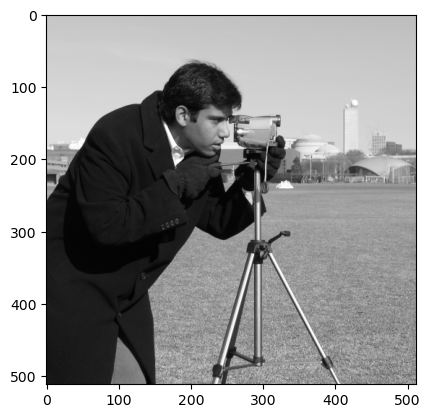

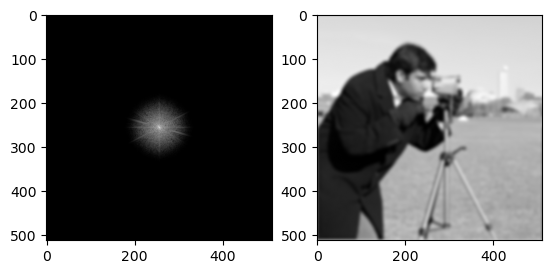

In [22]:
import skimage
import matplotlib.pyplot as plt
import numpy as np
import cv2

camera = skimage.data.camera() / 255.0
plt.imshow(camera,cmap='gray')

ff = np.fft.fft2(camera)
ff = np.fft.fftshift(ff)
mask = np.zeros_like(camera)
cv2.circle(mask, (mask.shape[1]//2,mask.shape[0]//2),32,1,-1)
mask  = skimage.filters.gaussian(mask,sigma=15)
ff = ff * (mask)
ff = np.fft.ifftshift(ff)
iff = np.fft.ifft2(ff)

print(camera.min(),camera.max(), ff.min(), ff.max())
print(camera.shape, ff.shape)
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(np.log1p(np.abs(np.fft.fftshift(ff))),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.log1p(np.abs(iff)),cmap='gray')
plt.show()


Zadanie 2

ValueError: operands could not be broadcast together with shapes (512,512) (540,404) 

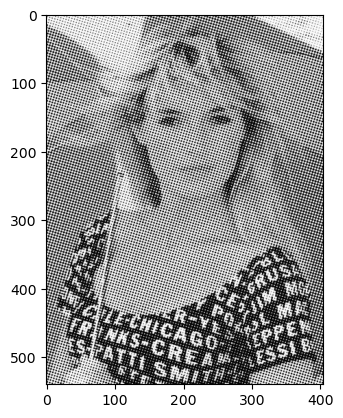

In [34]:
woman= skimage.io.imread('dane/gray1.jpg') / 255.0

plt.imshow(woman, cmap='gray')

ff_w = np.fft.fft2(woman)
ff_w = np.fft.fftshift(ff_w)
mask_w = np.zeros_like(woman)
cv2.circle(mask_w, (mask_w.shape[1]//2,mask_w.shape[0]//2),32,1,-1)

new_mask = np.zeros_like(woman)
for_local_maxima = ff * (1 - mask_w)
coords = skimage.feature.peak_local_max(np.abs(for_local_maxima), min_distance=5)
for c in coords:
    new_mask[c[0],c[1]] = 1


mask_w  = skimage.filters.gaussian(mask_w,sigma=15)
ff_w = ff_w * (mask_w)
ff_w = np.fft.ifftshift(ff_w)
iff_w = np.fft.ifft2(ff_w)

plt.subplots(1,2)
plt.subplot(1,2,1)
plt.imshow(np.log1p(np.abs(np.fft.fftshift(ff_w))),cmap='gray')
plt.subplot(1,2,2)
plt.imshow(np.log1p(np.abs(iff_w)),cmap='gray')
plt.show()

